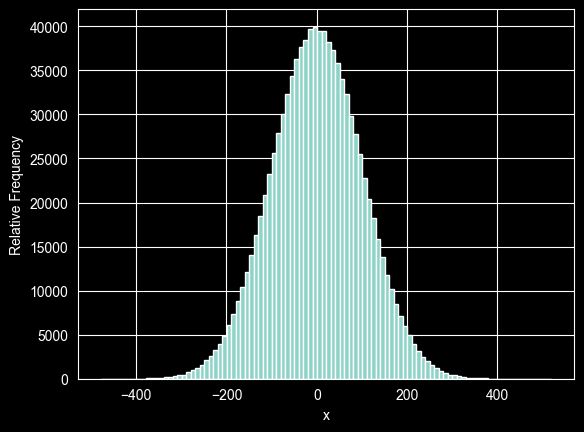

In [9]:
import random

import matplotlib.pyplot as plt
import pylab

dist , numSamples = [] , 1000000

for i in range(numSamples):
    dist.append(random.gauss(0,100))


weight = [1/numSamples] * len(dist)
v = pylab.hist(dist,bins = 100)

pylab.xlabel('x')
pylab.ylabel('Relative Frequency')

print(f'Fractopm within ~200 of mean of {sum(v[0][30:70])}')  #-> 0.957147
plt.show()


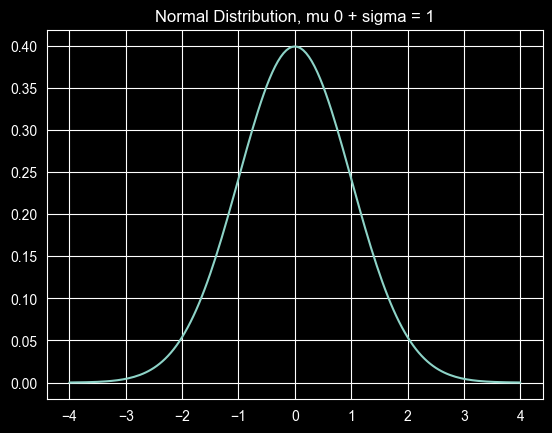

In [10]:
import matplotlib.pyplot as plt
import pylab

def gaussian(x,mu,sigma):
    factor1 = (1.0 / (sigma* ((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x - mu)**2)/(2*sigma**2))

    return factor1 * factor2

xVals , yVals = [], []

mu , sigma = 0,1

x = -4

while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.05

pylab.plot(xVals, yVals)
pylab.title(f'Normal Distribution, mu {str(mu)} + sigma = {str(sigma)}')
plt.show()

In [11]:
import scipy.integrate

def gaussian(x,mu,sigma):
    factor1 = (1.0 / (sigma* ((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x - mu)**2)/(2*sigma**2))

    return factor1 * factor2

def checkRmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10,10)
        sigma = random.randint(1,10)

        print(f'For mu = {mu} and sigma = {sigma}')

    for numStd in (1,196,3):
        area = scipy.integrate.quad(gaussian,mu-numStd*sigma,mu+numStd*sigma,(mu, sigma)) [0]

        print(' Fraction within', numStd,
'std =', round(area, 4))

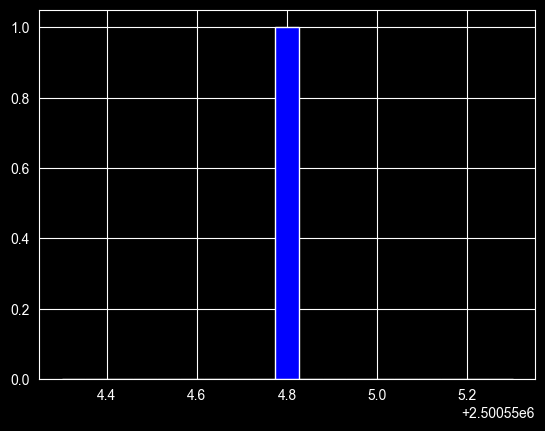

In [13]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    vals = 0

    for j in range(numRolls // numDice):
        vals += 5*random.random()
    means.append(vals / float(numDice))

    pylab.hist(means,numBins,color = color, label = legend,
               weight = pylab.array(len(means) * [1]) / len(means),
                hatch = style)

    return getMeanAndStd(means)

mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()












In [ ]:
numTrials = 1000000
numSpins = 200
game = FairRoulette()
means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins,False)[0])

pylab.hist(means, bins = 19,
weights = [1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200 Times')

In [23]:
def throwNeedles(numNeedles):
    inCircle = 0

    for Needles in range(1, numNeedles + 1 , 1):
        x = random.random()
        y = random.random()

        if (x*x + y*y) ** 0.5 <= 1.0:
            inCircle += 1

    return 4*(inCircle/ float(numNeedles))

def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)

    sDev = std(estimates)
    curEst = sum(estimates)/len(estimates)

    print('Est. = ' + str(curEst) +\
    ', Std. dev. = ' + str(round(sDev, 6))\
    + ', Needles = ' + str(numNeedles))

    return (curEst, sDev)


In [ ]:
def estPi(precision, numTrials):
    numNeedls = 1000
    sDev = precision

    while sDev >= precision/2:
        curEst , sDev = getEst(numNeedls,numTrials)

        numNeedls *= 2

    return curEst

estPi(0.005, 100)

In [26]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:

            inCircle += 1
            return 2*(inCircle/float(numNeedles))